In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Теория 0. Сделать на пофиг min(84%)
# Теория 1. Убрать неколлерирующие данные min(86%)

#Разведка и предобработка

In [ ]:
df = pd.read_csv('train_1.csv')

NameError: ignored

In [ ]:
df.head(3)
#Первые 10 ячеек чисто по приколу)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
for C in df.columns:
  print(C, ' - ', df[C].nunique())

In [ ]:
df['price_range'].value_counts()

In [ ]:
df.nunique()[df.nunique() > 20]

In [ ]:
df[df.nunique()[df.nunique() > 20].index]

In [ ]:
df_numerical = df[df.nunique()[df.nunique() > 20].index]
df_categorical = df[df.nunique()[df.nunique() < 20].index]
df_categorical.drop(columns='price_range', inplace=True)
Y = df['price_range']

#Аналитика

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


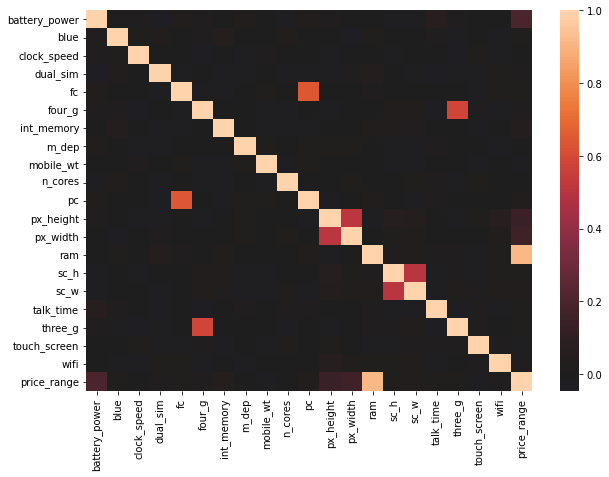

In [ ]:
print(df.corr()['price_range'])

plt.figure(figsize=(10,7))
df_forplot = df_numerical
df_forplot['price_range'] = Y
sns.heatmap(df.corr(), center = 0)
df_numerical.drop(columns='price_range', inplace=True)
plt.show()

##Числовые

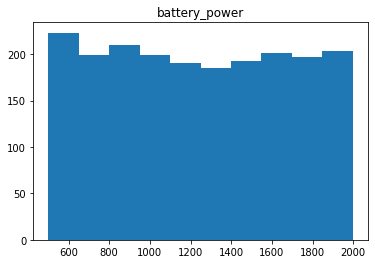

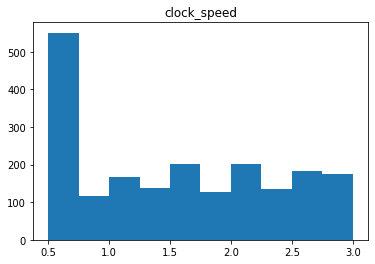

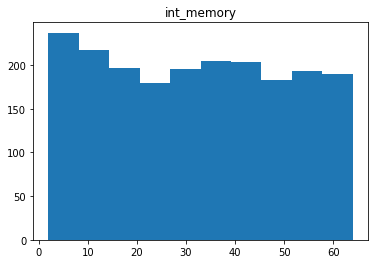

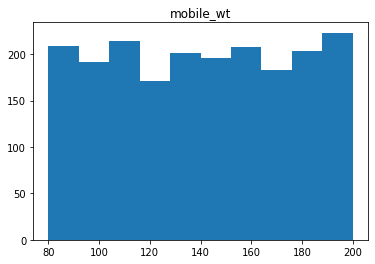

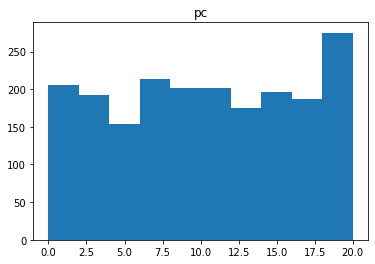

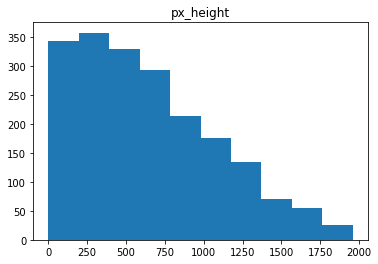

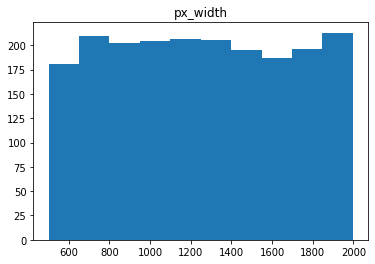

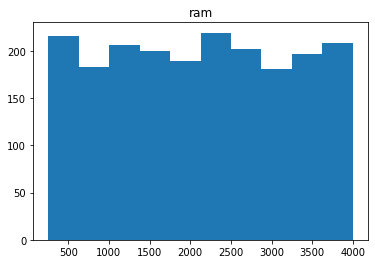

In [ ]:
for i in range(len(df_numerical.columns)):
  plt.hist(df_numerical.iloc[:, i])
  plt.title(df_numerical.columns[i])
  plt.show()

##Категориальные

In [ ]:
for i in range(len(df_categorical.columns)):
    df1 = pd.get_dummies(df_categorical.iloc[:, i])
    print(df1)


      0  1
0     1  0
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
1995  0  1
1996  0  1
1997  1  0
1998  1  0
1999  0  1

[2000 rows x 2 columns]
      0  1
0     1  0
1     0  1
2     0  1
3     1  0
4     1  0
...  .. ..
1995  0  1
1996  0  1
1997  0  1
1998  1  0
1999  0  1

[2000 rows x 2 columns]
      0  1
0     1  0
1     0  1
2     0  1
3     1  0
4     0  1
...  .. ..
1995  0  1
1996  1  0
1997  0  1
1998  0  1
1999  0  1

[2000 rows x 2 columns]
      0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0       0    0    0    0    0    1    0    0    0    0
1       0    0    0    0    0    0    1    0    0    0
2       0    0    0    0    0    0    0    0    1    0
3       0    0    0    0    0    0    0    1    0    0
4       0    0    0    0    0    1    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1995    0    0    0    0    0    0    0    1    0    0
1996    0    1    0    0    0    0    0    0    0    0
1997    0    0    0    0    0    0

#Кто бы меня обучил сначала

## Одинокое дерево

In [ ]:
df.columns[df.corr()['price_range'] > 0.05]


Index(['battery_power', 'px_height', 'px_width', 'ram', 'price_range'], dtype='object')

In [ ]:
#Делим выборку на Тестовую и трэйновую
# Кааароч, путем несложных поглядушек на графики выше, я увидел, что а нафига нужно так много фичей.
# и оставил ток те, которые коррелируют.
# Итог: до этого f1 был в размере до 84% сейчас ~86%

X = df[df.columns[df.corr()['price_range'] > 0.05]] 
X = X.drop(columns = 'price_range')
#X = df.drop(columns = 'price_range')
y = df['price_range'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

print(X.head(3))

   battery_power  px_height  px_width   ram
0            842         20       756  2549
1           1021        905      1988  2631
2            563       1263      1716  2603


In [ ]:
#Балуем одно дерево
clf = tree.DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')


clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
print('accuracy - ', sklearn.metrics.accuracy_score(y_test, y_pred),
      'f1 score - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
print(cnf_matrix)
print(scores.mean())
#ничего не понятно, но очень интересно

accuracy -  0.8625 f1 score -  0.8595533532799439
[[ 93  12   0   0]
 [  3  79   9   0]
 [  0  10  73   9]
 [  0   0  12 100]]
0.8526772479355087


In [ ]:
# Не все включено
# accuracy -  0.8625 f1 score -  0.8595533532799439
# [[ 93  12   0   0]
#  [  3  79   9   0]
#  [  0  10  73   9]
#  [  0   0  12 100]]
# 0.8526772479355087

#Все включено
# accuracy -  0.8325 f1 score -  0.8267094179840448
# [[ 92  13   0   0]
#  [ 10  76   5   0]
#  [  0  12  64  16]
#  [  0   0  11 101]]
# 0.8285693431095394

##Гридсерчъ


In [ ]:
# ГРИДСЕЕЕЕРч
clf1 = tree.DecisionTreeClassifier(random_state=42)
parametrs = { 'max_depth': range (1,17, 2),
              'min_samples_leaf': range (2,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)


print( grid.best_params_, '\n',
       grid.best_score_, '\n')



{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4} 
 0.858125 



In [ ]:
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)

cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
print('accuracy - ', sklearn.metrics.accuracy_score(y_test, y_pred),
      'f1 score - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
print(cnf_matrix)

accuracy -  0.8725 f1 score -  0.8703546844834917
[[94 11  0  0]
 [ 3 82  6  0]
 [ 0 10 75  7]
 [ 0  0 14 98]]


In [ ]:
# Не все включено
# accuracy -  0.8725 f1 score -  0.8703546844834917
# [[94 11  0  0]
#  [ 3 82  6  0]
#  [ 0 10 75  7]
#  [ 0  0 14 98]]

# Все включено
# accuracy -  0.84 f1 score -  0.8371335097834861
# [[91 14  0  0]
#  [ 7 75  9  0]
#  [ 0  9 73 10]
#  [ 0  0 15 97]]

## Лесное царство

In [ ]:
X = df[df.columns[df.corr()['price_range'] > 0.05]] 
X = X.drop(columns = 'price_range')
#X = df.drop(columns = 'price_range')
y = df['price_range'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [ ]:
#Ну чисто попробовать, вдруг сработает GLHF 11 минут 



Forest_clf = RandomForestClassifier(random_state=42)
param_dist = {'n_estimators' : range(50, 110, 20),
               'max_depth' : range (1, 20, 2),
               'min_samples_split' :  range(1,10, 2),
               'min_samples_leaf' : range(1,8)}
grid1 = GridSearchCV(Forest_clf, param_dist, cv=5)
grid1.fit(X_train, y_train)


print( grid1.best_params_, '\n',
       grid1.best_score_, '\n')



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 5250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobli

{'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 90} 
 0.9125 



In [ ]:
# Тыкать на свой страх и риск
best_clf_forest = grid1.best_estimator_

In [ ]:

y_pred = best_clf_forest.predict(X_test)

cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
print('accuracy - ', sklearn.metrics.accuracy_score(y_test, y_pred),
      'f1 score macro - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'),
      'f1 score micro - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'micro'),
      )
print(cnf_matrix)

accuracy -  0.9425 f1 score macro -  0.9414255582806033 f1 score micro -  0.9425
[[101   4   0   0]
 [  1  88   2   0]
 [  0   4  84   4]
 [  0   0   8 104]]


In [ ]:
# TRY 1
# {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4} 
#  0.875 
# accuracy -  0.88 f1 score -  0.8761491582742931
# [[100   5   0   0]
#  [  8  73  10   0]
#  [  0   7  79   6]
#  [  0   0  12 100]]

# SILLY TRY
# {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6} 
#  0.9106250000000001 
# accuracy -  0.93 f1 score -  0.9288294992618233
# [[100   5   0   0]
#  [  1  88   2   0]
#  [  0   5  82   5]
#  [  0   0  10 102]]

#FINAL TRY
# accuracy -  0.9375 f1 score -  0.9363794417648144
# [[100   5   0   0]
#  [  1  88   2   0]
#  [  0   4  83   5]
#  [  0   0   8 104]]

In [ ]:
# Это чтобы оставить все столбики

# X = df.drop(columns = 'price_range')
# y = df['price_range'] 
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     train_size=0.8, 
#                                                     random_state=42)
# df.shape

3    108
0    102
1     96
2     94
dtype: int64

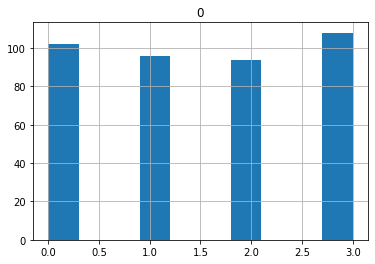

In [ ]:
pd.DataFrame(y_pred).hist()
pd.DataFrame(y_pred).value_counts()